# Explore here

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos los fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

¿Cuál sera la prima (coste)?

In [51]:
df.shape

(1338, 7)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Tenemos 1338 filas y 7 columnas, todas completas sin valores nulos

In [53]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [54]:
ohe = OneHotEncoder(handle_unknown='ignore',drop='first') 
ohe_df = pd.DataFrame(ohe.fit_transform(df[['sex']]).toarray()) 
ohe_df.columns = ohe.get_feature_names_out(['sex'])
df=df.join(ohe_df) 

In [55]:
ohe = OneHotEncoder(handle_unknown='ignore',drop='first') 
ohe_df = pd.DataFrame(ohe.fit_transform(df[['smoker']]).toarray()) 
ohe_df.columns = ohe.get_feature_names_out(['smoker'])
df=df.join(ohe_df) 

In [56]:
ohe = OneHotEncoder(handle_unknown='ignore') 
ohe_df = pd.DataFrame(ohe.fit_transform(df[['region']]).toarray()) 
ohe_df.columns = ohe.get_feature_names_out(['region'])
df=df.join(ohe_df) 

In [57]:
df

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0.0,0.0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
df

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0.0,0.0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_male', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

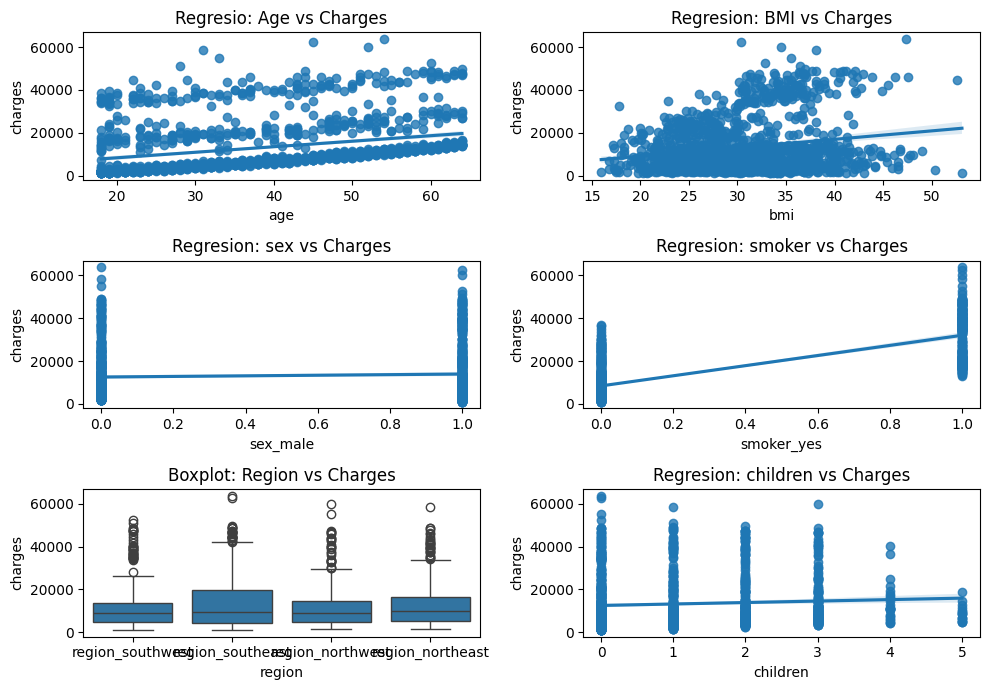

In [60]:
fig, axis = plt.subplots(3, 2, figsize = (10, 7))

ordinal_features = ['region']
ordinal_encoder = OrdinalEncoder()
df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

df['region'] = df[['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1)


sns.regplot(ax=axis[0, 0], data=df, x='age', y='charges')
axis[0, 0].set_title('Regresio: Age vs Charges')

sns.regplot(ax=axis[0, 1], data=df, x='bmi', y='charges')
axis[0, 1].set_title('Regresion: BMI vs Charges')

sns.regplot(ax=axis[1, 0], data=df, x='sex_male', y='charges')
axis[1, 0].set_title('Regresion: sex vs Charges')

sns.regplot(ax=axis[1, 1], data=df, x='smoker_yes', y='charges')
axis[1, 1].set_title('Regresion: smoker vs Charges')

sns.boxplot(ax=axis[2, 0], x='region', y='charges', data=df)
axis[2, 0].set_title('Boxplot: Region vs Charges')

sns.regplot(ax=axis[2, 1], data=df, x='children', y='charges')
axis[2, 1].set_title('Regresion: children vs Charges')

plt.tight_layout()

plt.show()

In [61]:
df=df.drop(columns=['sex','children','smoker','region','region_northwest'])

In [62]:
df

,age,bmi,charges,sex_male,smoker_yes,region_northeast,region_southeast,region_southwest
0,19,27.900,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,21984.47061,1.0,0.0,0.0,0.0,0.0
4,32,28.880,3866.85520,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1.0,0.0,0.0,0.0,0.0
1334,18,31.920,2205.98080,0.0,0.0,1.0,0.0,0.0
1335,18,36.850,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,2007.94500,0.0,0.0,0.0,0.0,1.0


In [63]:
from sklearn.preprocessing import StandardScaler

estandarizachone=StandardScaler()
df[['age', 'bmi', 'charges']] = estandarizachone.fit_transform(df[['age', 'bmi', 'charges']])


In [64]:
df

,age,bmi,charges,sex_male,smoker_yes,region_northeast,region_southeast,region_southwest
0,-1.438764,-0.453320,0.298584,0.0,1.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.953689,1.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,-0.728675,1.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,0.719843,1.0,0.0,0.0,0.0,0.0
4,-0.513149,-0.292556,-0.776802,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,-0.220551,1.0,0.0,0.0,0.0,0.0
1334,-1.509965,0.206139,-0.914002,0.0,0.0,1.0,0.0,0.0
1335,-1.509965,1.014878,-0.961596,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.930362,0.0,0.0,0.0,0.0,1.0


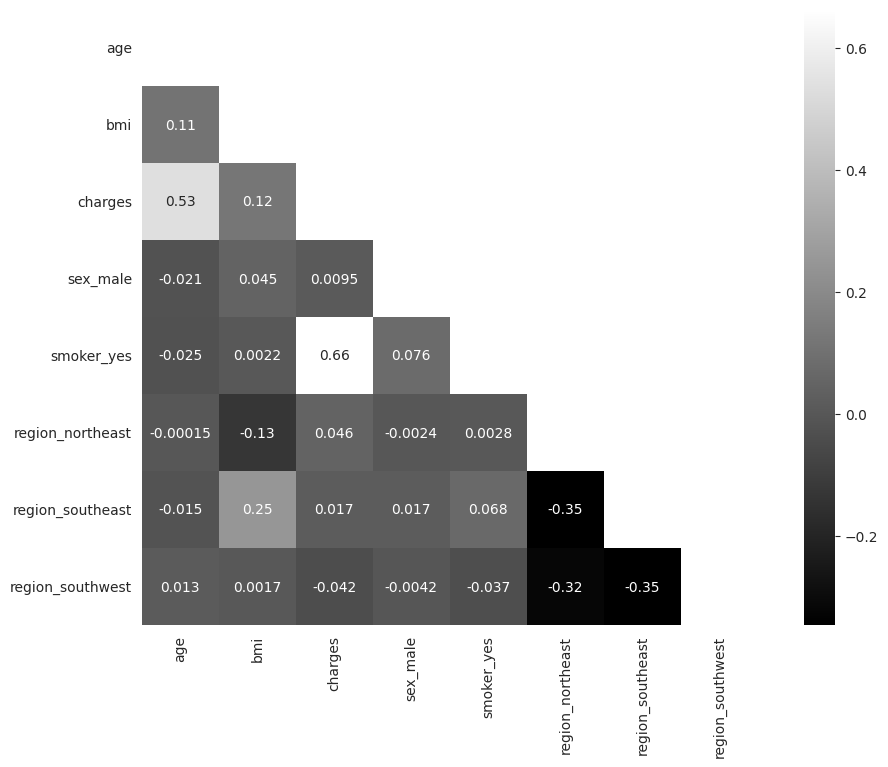

In [65]:
corrMatrix = df.corr(method='spearman')

mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(corrMatrix, mask=mask, square=True, annot=True, cmap="gray")

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df[df.columns[df.columns!='charges']]
y = df['charges']
X_train,X_test,y_train,y_test=train_test_split(X, y,
                                                    test_size=0.3,
                                                    shuffle = True,
                                                    random_state = 123)

In [68]:
X_train

,age,bmi,sex_male,smoker_yes,region_northeast,region_southeast,region_southwest
300,-0.228344,-0.510736,1.0,0.0,1.0,0.0,0.0
904,1.480485,0.727800,0.0,0.0,0.0,0.0,1.0
670,-0.655551,0.148723,1.0,0.0,0.0,1.0,0.0
617,0.697271,-0.830622,1.0,1.0,0.0,0.0,1.0
373,-0.940356,0.366902,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
1238,-0.157143,-1.305531,1.0,0.0,1.0,0.0,0.0
1147,-1.367563,0.206139,0.0,0.0,0.0,0.0,0.0
106,-1.438764,-0.371298,0.0,0.0,0.0,0.0,1.0
1041,-1.509965,-1.243194,1.0,0.0,1.0,0.0,0.0


In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
clf=LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [71]:
print(f"Intercepto (a): {clf.intercept_}")
print(f"Coeficientes (b): {clf.coef_}")

Intercepto (a): -0.3736589837696997
Coeficientes (b): [ 0.30125768  0.17695049 -0.0030614   1.96124762  0.04344866 -0.04583073
 -0.04622758]


In [72]:
y_preds=clf.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_preds)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_preds)}")

Error cuadrático medio: 0.2333473847412265
Coeficiente de determinación: 0.7606370909476506


Las variables de mi modelo solo explican el 23.33% de la variabilidad de los datos :c